# In this notebook we will explain how to measure the size of your apriltag correctly

Setup:

In [76]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from robotpy_apriltag import AprilTagDetector

from reflectdetect.utils.apriltags import get_detector_config

plt.close('all')


def show_tag(family: str):
    detector = AprilTagDetector()
    assert detector.addFamily(family)
    detector.setConfig(get_detector_config())
    tag = detector.detect(contrast_img)[0]
    plt.imshow(contrast_img)
    plt.xlim(tag.getCenter().x - 100, tag.getCenter().x + 100)
    plt.ylim(tag.getCenter().y - 100, tag.getCenter().y + 100)
    plt.scatter(tag.getCenter().x, tag.getCenter().y)
    corners = tag.getCorners((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,))
    x, y = corners[::2], corners[1::2]
    # Append the first point to the end to close the rectangle/polygon
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    plt.plot(x, y, linewidth=4, label=family)
    t = plt.text(tag.getCenter().x, tag.getCenter().y-80, family)
    t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))
    plt.show()

# There are some caveats when measuring the area of apriltags to set the tag_size parameter correctly.
## We expect you to supply the tag_size parameter when detecting Apriltag to be able to calculate the location of the calibration panel. This parameter should specify the width of the tag. The width of the tag should be measured only over the main area of the tag and will automatically be converted to the full distance to the panel border. 
## Which part of the tag you should measure can differ from tag family to family:

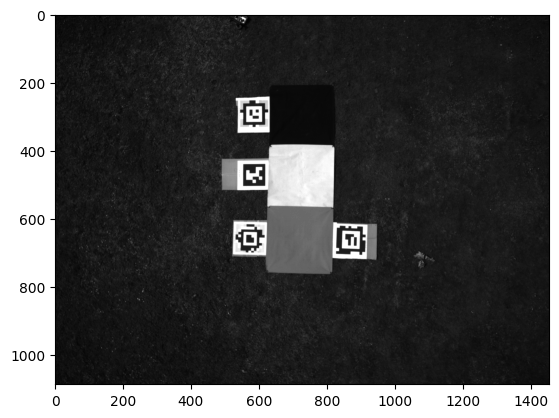

In [77]:
%matplotlib inline
# Load example image

path = Path("data/apriltag_distance_test_low.tif")
assert path.exists()
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
max_value = np.max(img)
contrast_img = ((img / max_value) * 255).astype('uint8')
plt.imshow(contrast_img)
plt.gray()
plt.show()

# When working with AprilTag2 families like the recommended "tag25h9" measuring the tag_size is straight forward.
## Measure the width of the black square without the white border as shown below

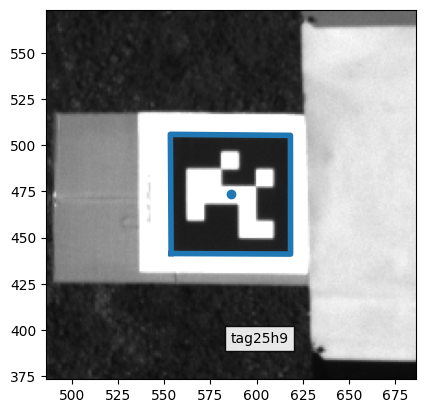

In [78]:
show_tag("tag25h9")

# But for AprilTag3 families like "tagStandard52h13" it can be more complicated. 
## Measure the width of the main tag and ignore the border.

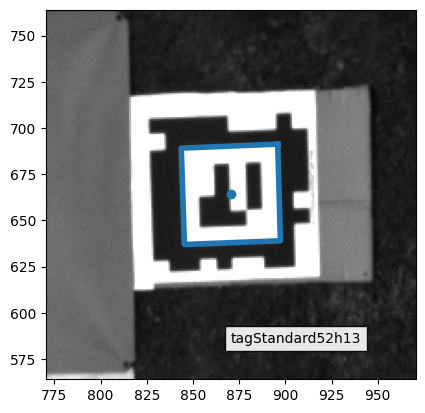

In [79]:
show_tag("tagStandard52h13")

# Here are some more examples:

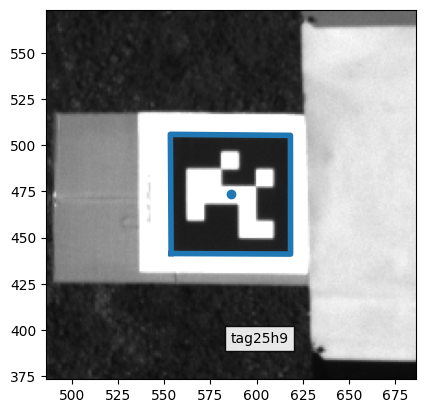

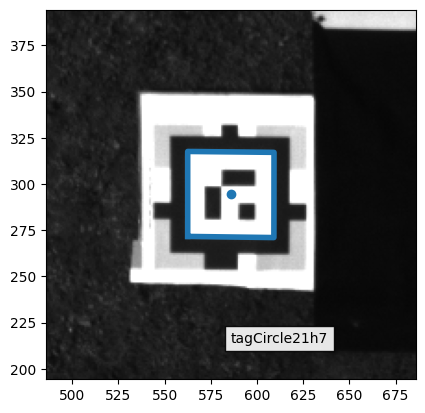

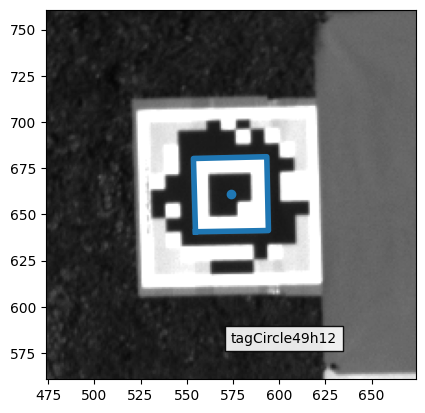

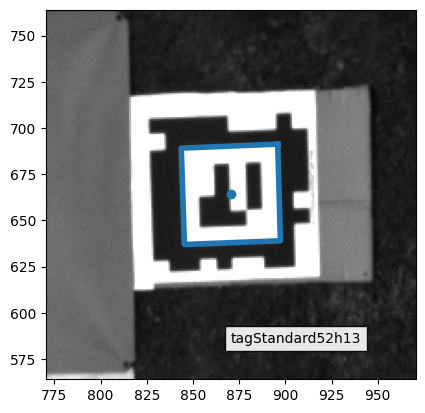

In [80]:
for family in ["tag25h9",
               "tagCircle21h7",
               "tagCircle49h12",
               "tagStandard52h13", ]:
    show_tag(family)